<a href="https://colab.research.google.com/github/stephenchen0814/04-LinearReg_Salary/blob/main/Preprocessing%2C%20Pipeline%2C%20Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder,RobustScaler
from sklearn.metrics import confusion_matrix
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import FunctionTransformer
np.set_printoptions(precision=3, suppress=True)
import warnings
warnings.filterwarnings("ignore")

In [6]:
dataset=datasets.fetch_openml("Ionosphere", version=1)
X,y= dataset.data, dataset.target
X.shape

(351, 34)

In [7]:
X

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [8]:
y.head()

,class
0,g
1,b
2,g
3,b
4,g


In [9]:
dataset.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a01     351 non-null    int64  
 1   a02     351 non-null    int64  
 2   a03     351 non-null    float64
 3   a04     351 non-null    float64
 4   a05     351 non-null    float64
 5   a06     351 non-null    float64
 6   a07     351 non-null    float64
 7   a08     351 non-null    float64
 8   a09     351 non-null    float64
 9   a10     351 non-null    float64
 10  a11     351 non-null    float64
 11  a12     351 non-null    float64
 12  a13     351 non-null    float64
 13  a14     351 non-null    float64
 14  a15     351 non-null    float64
 15  a16     351 non-null    float64
 16  a17     351 non-null    float64
 17  a18     351 non-null    float64
 18  a19     351 non-null    float64
 19  a20     351 non-null    float64
 20  a21     351 non-null    float64
 21  a22     351 non-null    float64
 22  a2

In [10]:
X.isna().sum()

,0
a01,0
a02,0
a03,0
a04,0
a05,0
a06,0
a07,0
a08,0
a09,0
a10,0


In [12]:
X_num=X.loc[:,["a07", "a08"]]
imp_median = SimpleImputer(strategy='median')
X_num.iloc[:,:]=imp_median.fit_transform(X_num.iloc[:,:])
X_num.isna().sum()

,0
a07,0
a08,0


In [13]:
sc=StandardScaler()

X_num.iloc[:,:]=sc.fit_transform(X_num.iloc[:,:])
X_num

,a07,a08
0,0.577059,-0.954679
1,-1.339106,-2.029452
2,0.914531,-0.461494
3,0.329433,-2.152585
4,0.754068,-0.676741
...,...,...
346,0.596390,-0.336592
347,0.781144,-0.266458
348,0.816493,-0.295516
349,0.826941,-0.299650


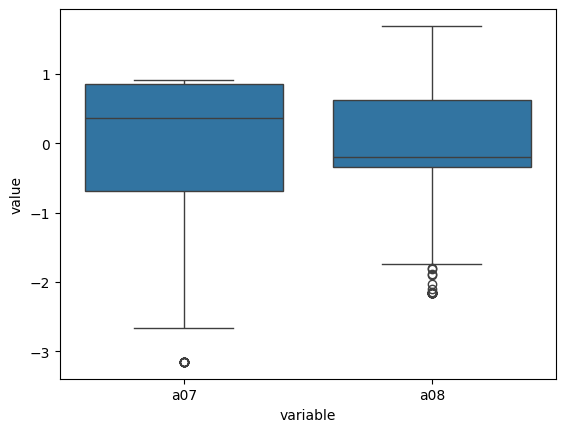

In [14]:
sns.boxplot(x="variable", y="value", data=pd.melt(X_num))

plt.show()

In [16]:
Outliers=X_num[(~X_num['a07'].between(-3,3)) | (~X_num['a08'].between(-3,3))]
Outliers.count()

,0
a07,13
a08,13


In [17]:
X_num=X_num[(X_num['a07'].between(-3,3)) & (X_num['a08'].between(-3,3))]
X_num

,a07,a08
0,0.577059,-0.954679
1,-1.339106,-2.029452
2,0.914531,-0.461494
3,0.329433,-2.152585
4,0.754068,-0.676741
...,...,...
346,0.596390,-0.336592
347,0.781144,-0.266458
348,0.816493,-0.295516
349,0.826941,-0.299650


In [21]:
X_cat=X.loc[:,["a15", "a20"]]

onehotenc=OneHotEncoder(sparse_output=False,handle_unknown='ignore')

X_cat_emb=onehotenc.fit_transform(X_cat.loc[:,["a15"]])
one_hot_df = pd.DataFrame(X_cat_emb, columns=onehotenc.get_feature_names_out(["a15"]))

df_encoded = pd.concat([X_cat, one_hot_df], axis=1)

df_encoded = df_encoded.drop(["a15"], axis=1)
df_encoded

,a20,a15_-1.0,a15_-0.9765,a15_-0.96986,a15_-0.96631,a15_-0.96078,a15_-0.95489,a15_-0.94053,a15_-0.92857,a15_-0.92819,...,a15_0.97055,a15_0.97261,a15_0.97518,a15_0.98214,a15_0.98625,a15_0.9917,a15_0.99264,a15_0.99382,a15_0.99828,a15_1.0
0,-0.32192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.08540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.54467,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.17813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.06618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,0.06038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,0.01393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349,-0.12928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
X=X.loc[:,[ "a07", "a08","a01", "a15", "a20"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
numeric_features = ["a07", "a08"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["a01", "a15", "a20"]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=70)),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [25]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

In [26]:
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))  # average accuracy
clf

model score: 0.887


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['a07', 'a08']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=70,
                                                                                    score_func=<function chi2 at 0x7db2c9d3aca0>))]),
                                                  ['a01', 'a15', 'a20'])])),
                ('classifier', LogisticRegression())])

In [27]:
y_pred=clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[24,  6],
       [ 2, 39]])

In [28]:
n_samples=40
Lambda=0.001

X = np.random.rand(n_samples)
y=np.cos(1.5 * np.pi * X)+0.5*np.random.rand(n_samples)
X=X.reshape(-1,1)

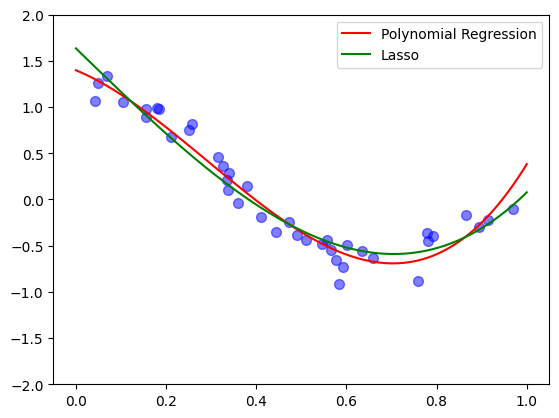

In [29]:
polymodel = PolynomialFeatures(degree=3, include_bias=True)
data=polymodel.fit_transform(X)
model1=LinearRegression()
model2=Lasso(alpha=Lambda)


model1.fit(data,y)
model2.fit(data,y)


X_plot=np.linspace(0,1,100).reshape(-1,1)
X_plot_poly=polymodel.transform(X_plot)
fig=plt.figure()
plt.scatter(X,y, c='b', s=50, alpha=.5)
plt.plot(X_plot,model1.predict(X_plot_poly),'-r', label='Polynomial Regression')
plt.plot(X_plot,model2.predict(X_plot_poly),'-g', label='Lasso')
plt.legend()
plt.ylim(-2,2)
fig.show()

In [30]:
y_pred1=model1.predict(polymodel.transform(X))
y_pred2=model2.predict(polymodel.transform(X))

Loss1=((y_pred1-y)**2).mean() +  Lambda*(np.abs(model1.coef_)).sum()
Loss2=((y_pred2-y)**2).mean() +  Lambda*(np.abs(model2.coef_)).sum()
Loss1,Loss2
print(f' Loss of Poly. Reg. Model with L1 Reg= {Loss1:.3f} \n Loss of Lasso Model with L1 Reg = {Loss2:.3f}')
print(f' Weights of Poly. Reg. Model= {model1.coef_[1:]} \n Weights of Lasso Model= {model2.coef_[1:]}')

 Loss of Poly. Reg. Model with L1 Reg= 0.038 
 Loss of Lasso Model with L1 Reg = 0.035
 Weights of Poly. Reg. Model= [-2.011 -6.965  7.96 ] 
 Weights of Lasso Model= [-4.737 -0.     3.179]


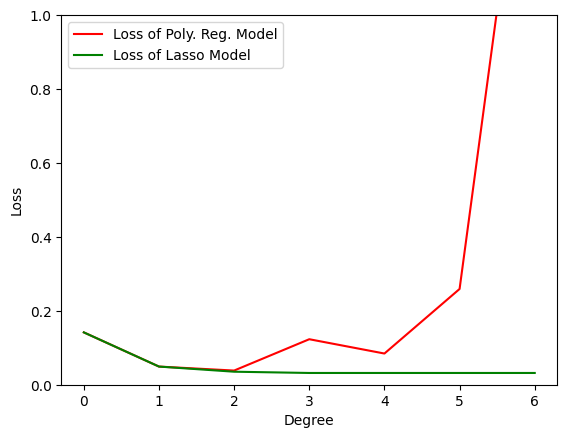

In [33]:
# L1 Reg
Loss1, Loss2= [],[]

for deg in range(1,8):
    polymodel = PolynomialFeatures(degree=deg, include_bias=True)
    data=polymodel.fit_transform(X)
    model1=LinearRegression()
    model2=Lasso(alpha=Lambda)


    model1.fit(data,y)
    model2.fit(data,y)

    y_pred1=model1.predict(polymodel.transform(X))
    y_pred2=model2.predict(polymodel.transform(X))

    Loss1.append(((y_pred1-y)**2).mean() +  Lambda*(np.abs(model1.coef_)).sum())
    Loss2.append(((y_pred2-y)**2).mean() +  Lambda*(np.abs(model2.coef_)).sum())

fig=plt.figure()
xv=np.arange(0,deg)
plt.plot(xv,Loss1,'-r', label='Loss of Poly. Reg. Model')
plt.plot(xv,Loss2,'-g', label='Loss of Lasso Model')
plt.ylim(0,1)
plt.ylabel("Loss")
plt.xlabel('Degree')
plt.legend()
plt.show()

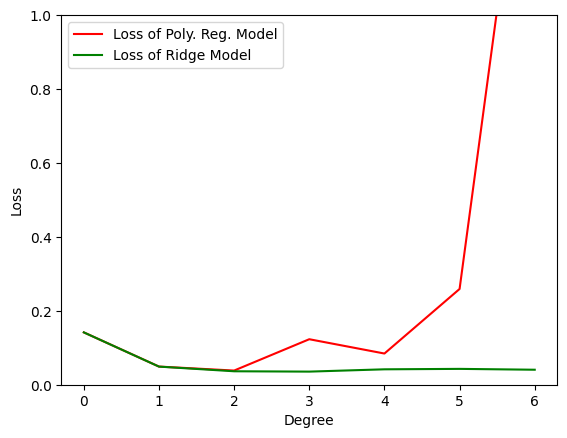

In [34]:
#L2 Reg
Loss1, Loss2= [],[]

for deg in range(1,8):
    polymodel = PolynomialFeatures(degree=deg, include_bias=True)
    data=polymodel.fit_transform(X)
    model1=LinearRegression()
    model2=Ridge(alpha=Lambda)


    model1.fit(data,y)
    model2.fit(data,y)

    y_pred1=model1.predict(polymodel.transform(X))
    y_pred2=model2.predict(polymodel.transform(X))

    Loss1.append(((y_pred1-y)**2).mean() +  Lambda*(np.abs(model1.coef_)).sum())
    Loss2.append(((y_pred2-y)**2).mean() +  Lambda*(np.abs(model2.coef_)).sum())

fig=plt.figure()
xv=np.arange(0,deg)
plt.plot(xv,Loss1,'-r', label='Loss of Poly. Reg. Model')
plt.plot(xv,Loss2,'-g', label='Loss of Ridge Model')
plt.ylim(0,1)
plt.ylabel("Loss")
plt.xlabel('Degree')
plt.legend()
plt.show()

In majority of cases, L2-Regularization performs the same or better. Main benefit of L1-Regularization is that it can shrink some coefficients to zero (removing less important features) and is mostly used whe you expect only a few features to be important.